# Lab 2: Avocado Prices

# **Data Set-up**

0. Import the data and declare your package dependencies.

In [427]:
# import necessary linraries and packages
import numpy as np
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, labs, geom_point, geom_boxplot, geom_bar, facet_wrap, scale_x_continuous, scale_y_continuous, theme, element_text, geom_tile, scale_fill_gradient, scale_size

In [428]:
# import dataset
df_avocado = pd.read_csv("avocado-updated-2020.csv")
df_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/15,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/15,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/15,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/15,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/15,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


1. Briefly describe the data set. What information does it contain?

The dataset is based off avocado prices and sales volume in different cities, states and metro regions of the United States. It contains the following columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

where the column of PLU 4046 represents the small haas avocados sales volume, PLU 4225 represents the large haas avocados sales volume and PLU 4770 represents the xlarge haas avocados sales volume.

In [429]:
# use describe function to provide insights into dataset
df_avocado.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


2. Clean the data in any way you see fit.

In [430]:
# Renamed the PLU columns in the dataset to the sizes
avocado_clean = df_avocado.rename(columns={'4046': 'Small', '4225': 'Large', '4770': 'Extra Large'})
avocado_clean.dropna(inplace = True)

In [431]:
# change data type of columns
avocado_clean['year'] = avocado_clean['year'].astype(float)
avocado_clean['Small Haas'] = avocado_clean['Small'].astype(float)
avocado_clean['Large Haas'] = avocado_clean['Large'].astype(float)
avocado_clean['Extra Large Haas'] = avocado_clean['Extra Large'].astype(float)
avocado_clean

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Small Haas,Large Haas,Extra Large Haas
0,1/4/15,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015.0,Albany,2819.50,28287.42,49.90
1,1/4/15,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015.0,Albany,57.42,153.88,0.00
2,1/4/15,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015.0,Atlanta,364302.39,23821.16,82.15
3,1/4/15,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015.0,Atlanta,1500.15,938.35,0.00
4,1/4/15,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015.0,Baltimore/Washington,53987.31,552906.04,39995.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,11/29/20,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020.0,Total U.S.,67544.48,97996.46,2617.17
33041,11/29/20,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020.0,West,1352877.53,589061.83,19741.90
33042,11/29/20,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020.0,West,13273.75,19341.09,636.51
33043,11/29/20,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020.0,West Tex/New Mexico,234688.01,80205.15,10543.63


In [432]:
# obtain unique values of geography column
avocado_clean['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [433]:
# create a dictionary to map the cities
city_dict = {"Seattle":"Seattle", "Spokane":"Spokane",'Albany':'Albany', 'Atlanta':'Atlanta',"Boise":"Boise", "Boston":"Boston", "Charlotte":"Charlotte",
             "Chicago":"Chicago", "Columbus":"Columbus", "Denver":"Denver", "Grand Rapids":"Grand Rapids", "Houston":"Houston", "Los Angeles":"Los Angeles",
             "St. Louis":"St. Louis", "Syracuse":"Syracuse", "Tampa":"Tampa", "Louisville":"Louisville", "Nashville":"Nashville", "New York":"New York",
             "Orlando":"Orlando", "Philadelphia":"Philadelphia", "Pittsburgh":"Pittsburgh","Indianapolis":"Indianapolis", "Jacksonville":"Jacksonville",
             "Portland":"Portland", "Roanoke":"Roanoke", "Sacramento":"Sacramento", "San Diego":"San Diego", "San Francisco":"San Francisco",
             "Las Vegas":"Las Vegas", "Detroit":"Detroit"}

# create a dictionary to map the metro areas
metro_dict = {"Cincinnati/Dayton":"Cincinnati/Dayton", "Miami/Ft. Lauderdale":"Miami/Ft. Lauderdale", "Richmond/Norfolk":"Richmond/Norfolk",
             "West Tex/New Mexico":"West Tex/New Mexico", "Baltimore/Washington":"Baltimore/Washington", "Buffalo/Rochester":"Buffalo/Rochester",
             "New Orleans/Mobile":"New Orleans/Mobile", "Dallas/Ft. Worth":"Dallas/Ft. Worth", "Hartford/Springfield":"Hartford/Springfield",
             "Phoenix/Tucson":"Phoenix/Tucson", "Raleigh/Greensboro":"Raleigh/Greensboro", "Harrisburg/Scranton":"Harrisburg/Scranton"}

# create a dictionary to map the regions
region_dict = {"Southeast":"Southeast", "West":"West", "Great Lakes":"Great Lakes", "Midsouth":"Midsouth", "Northeast":"Northeast",
               "Plains":"Plains", "South Central":"South Central","Northern New England":"Northern New England"}

# create a dictionary to map the states (New York is in the city dict)
state_dict = {"California":"California", "South Carolina":"South Carolina"}

# create a dictionary to map the countries
country_dict = {"Total U.S.":"Total U.S."}

# create new columns where the dictionaries  are used to extract every appropriate variable from its category
avocado_clean['city'] = avocado_clean['geography'].map(city_dict)

avocado_clean['metro'] = avocado_clean['geography'].map(metro_dict)

avocado_clean['region'] = avocado_clean['geography'].map(region_dict)

avocado_clean['state'] = avocado_clean['geography'].map(state_dict)

avocado_clean['country'] = avocado_clean['geography'].map(country_dict)

# print your datset
avocado_clean

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,Small Haas,Large Haas,Extra Large Haas,city,metro,region,state,country
0,1/4/15,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,...,2015.0,Albany,2819.50,28287.42,49.90,Albany,NaN,NaN,NaN,NaN
1,1/4/15,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,...,2015.0,Albany,57.42,153.88,0.00,Albany,NaN,NaN,NaN,NaN
2,1/4/15,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,...,2015.0,Atlanta,364302.39,23821.16,82.15,Atlanta,NaN,NaN,NaN,NaN
3,1/4/15,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,...,2015.0,Atlanta,1500.15,938.35,0.00,Atlanta,NaN,NaN,NaN,NaN
4,1/4/15,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,...,2015.0,Baltimore/Washington,53987.31,552906.04,39995.03,NaN,Baltimore/Washington,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,11/29/20,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,...,2020.0,Total U.S.,67544.48,97996.46,2617.17,NaN,NaN,NaN,NaN,Total U.S.
33041,11/29/20,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,...,2020.0,West,1352877.53,589061.83,19741.90,NaN,NaN,West,NaN,NaN
33042,11/29/20,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,...,2020.0,West,13273.75,19341.09,636.51,NaN,NaN,West,NaN,NaN
33043,11/29/20,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,...,2020.0,West Tex/New Mexico,234688.01,80205.15,10543.63,NaN,West Tex/New Mexico,NaN,NaN,NaN


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [434]:
# filter dataset by year and avocado type
filtered_avocado_clean = avocado_clean[(avocado_clean["type"] == "organic") & (avocado_clean["year"] == 2017 )]
filtered_avocado_clean.head()

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,Small Haas,Large Haas,Extra Large Haas,city,metro,region,state,country
11232,1/1/17,1.28,15307.87,867.66,3434.02,37.30,10968.89,10815.88,153.01,0.0,...,2017.0,West Tex/New Mexico,867.66,3434.02,37.30,NaN,West Tex/New Mexico,NaN,NaN,NaN
11234,1/8/17,1.18,14375.39,1327.98,2617.20,5.75,10424.46,10283.85,140.61,0.0,...,2017.0,West Tex/New Mexico,1327.98,2617.20,5.75,NaN,West Tex/New Mexico,NaN,NaN,NaN
11236,1/15/17,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.0,...,2017.0,West Tex/New Mexico,1203.87,2904.22,23.07,NaN,West Tex/New Mexico,NaN,NaN,NaN
11238,1/22/17,1.21,16430.64,1413.93,2820.53,20.25,12175.93,12073.07,102.86,0.0,...,2017.0,West Tex/New Mexico,1413.93,2820.53,20.25,NaN,West Tex/New Mexico,NaN,NaN,NaN
11240,1/29/17,1.30,17839.37,1486.34,4498.48,26.12,11828.43,11821.76,6.67,0.0,...,2017.0,West Tex/New Mexico,1486.34,4498.48,26.12,NaN,West Tex/New Mexico,NaN,NaN,NaN


In [435]:
# To answer this question, we will exclude the rows where the data represents the total U.S
avocado_clean_region = filtered_avocado_clean[filtered_avocado_clean['country'] != 'Total U.S.']
avocado_clean_region.head()

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,...,year,geography,Small Haas,Large Haas,Extra Large Haas,city,metro,region,state,country
11232,1/1/17,1.28,15307.87,867.66,3434.02,37.30,10968.89,10815.88,153.01,0.0,...,2017.0,West Tex/New Mexico,867.66,3434.02,37.30,NaN,West Tex/New Mexico,NaN,NaN,NaN
11234,1/8/17,1.18,14375.39,1327.98,2617.20,5.75,10424.46,10283.85,140.61,0.0,...,2017.0,West Tex/New Mexico,1327.98,2617.20,5.75,NaN,West Tex/New Mexico,NaN,NaN,NaN
11236,1/15/17,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.0,...,2017.0,West Tex/New Mexico,1203.87,2904.22,23.07,NaN,West Tex/New Mexico,NaN,NaN,NaN
11238,1/22/17,1.21,16430.64,1413.93,2820.53,20.25,12175.93,12073.07,102.86,0.0,...,2017.0,West Tex/New Mexico,1413.93,2820.53,20.25,NaN,West Tex/New Mexico,NaN,NaN,NaN
11240,1/29/17,1.30,17839.37,1486.34,4498.48,26.12,11828.43,11821.76,6.67,0.0,...,2017.0,West Tex/New Mexico,1486.34,4498.48,26.12,NaN,West Tex/New Mexico,NaN,NaN,NaN


In [436]:
# group dataset by selected variables
avocado_clean_region = avocado_clean_region[['Small', "region"]].groupby("region").sum()

In [437]:
# Now we can identify the total highest sales volume for Small Haas, Organic Avocados and store it in a variable
highest_total_organic = avocado_clean_region['Small'].idxmax()
highest_total_organic

# Obtain the row that corrresponds to this index
max_row = avocado_clean_region.loc[highest_total_organic]
max_row

Small    1870206.29
Name: West, dtype: float64

**From the output, we can say that the West was the major geographical region that sold the most total organic, small Hass avocados in 2017.**

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [438]:
# convert the date column to datetime type
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# create a month, day, and year column by extracting from the date column
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year

# Group by total average volume for each month
#avg_volume_per_month = avocado_clean.groupby('month')['total_volume'].mean()

#avg_volume_per_month
# create a column calculating the total average volume of each row
avocado_clean['average total volume'] = avocado_clean['total_volume'].mean()

# identify the highest average, total volume sales in the dataset
highest_avg_volume_month = avocado_clean['average total volume'].idxmax()

#highest_avg_volume_month
# Obtain the row that corrresponds to this index
highest_avg_volume_month_row = avocado_clean.loc[highest_avg_volume_month]

highest_avg_volume_month_row


date                    2015-01-04 00:00:00
average_price                          1.22
total_volume                       40873.28
Small                                2819.5
Large                              28287.42
Extra Large                            49.9
total_bags                          9716.46
small_bags                          9186.93
large_bags                           529.53
xlarge_bags                             0.0
type                           conventional
year                                   2015
geography                            Albany
Small Haas                           2819.5
Large Haas                         28287.42
Extra Large Haas                       49.9
city                                 Albany
metro                                   NaN
region                                  NaN
state                                   NaN
country                                 NaN
month                                     1
day                             

**From the output, we can say that the 1st month of the year, January, had the highest average volume of avocado sales in 2015.**

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [439]:
# group by the average total volume of each metro
avg_volume_per_metro = avocado_clean.groupby('metro')['total_volume'].mean()
avg_volume_per_metro

metro
Baltimore/Washington    452229.794281
Buffalo/Rochester        83661.640556
Cincinnati/Dayton       151524.194020
Dallas/Ft. Worth        712751.896814
Harrisburg/Scranton     153556.205539
Hartford/Springfield    170923.146716
Miami/Ft. Lauderdale    378668.053399
New Orleans/Mobile      154683.940392
Phoenix/Tucson          625038.257500
Raleigh/Greensboro      176436.771552
Richmond/Norfolk        149101.268676
West Tex/New Mexico     460774.328900
Name: total_volume, dtype: float64

**The metro area of Dallas/Ft. Worth  seems to have the most sold total avocados on average.**

In [440]:
# Find the top 5 metro regions with the highest average volume through indexing
top5_metro_regions = avg_volume_per_metro.nlargest(5).index
top5_metro_regions

# create a dataframe with the top 5 metro regions with the highest avg sales volume
top_5_metros_df = avocado_clean[avocado_clean['metro'].isin(top5_metro_regions)]

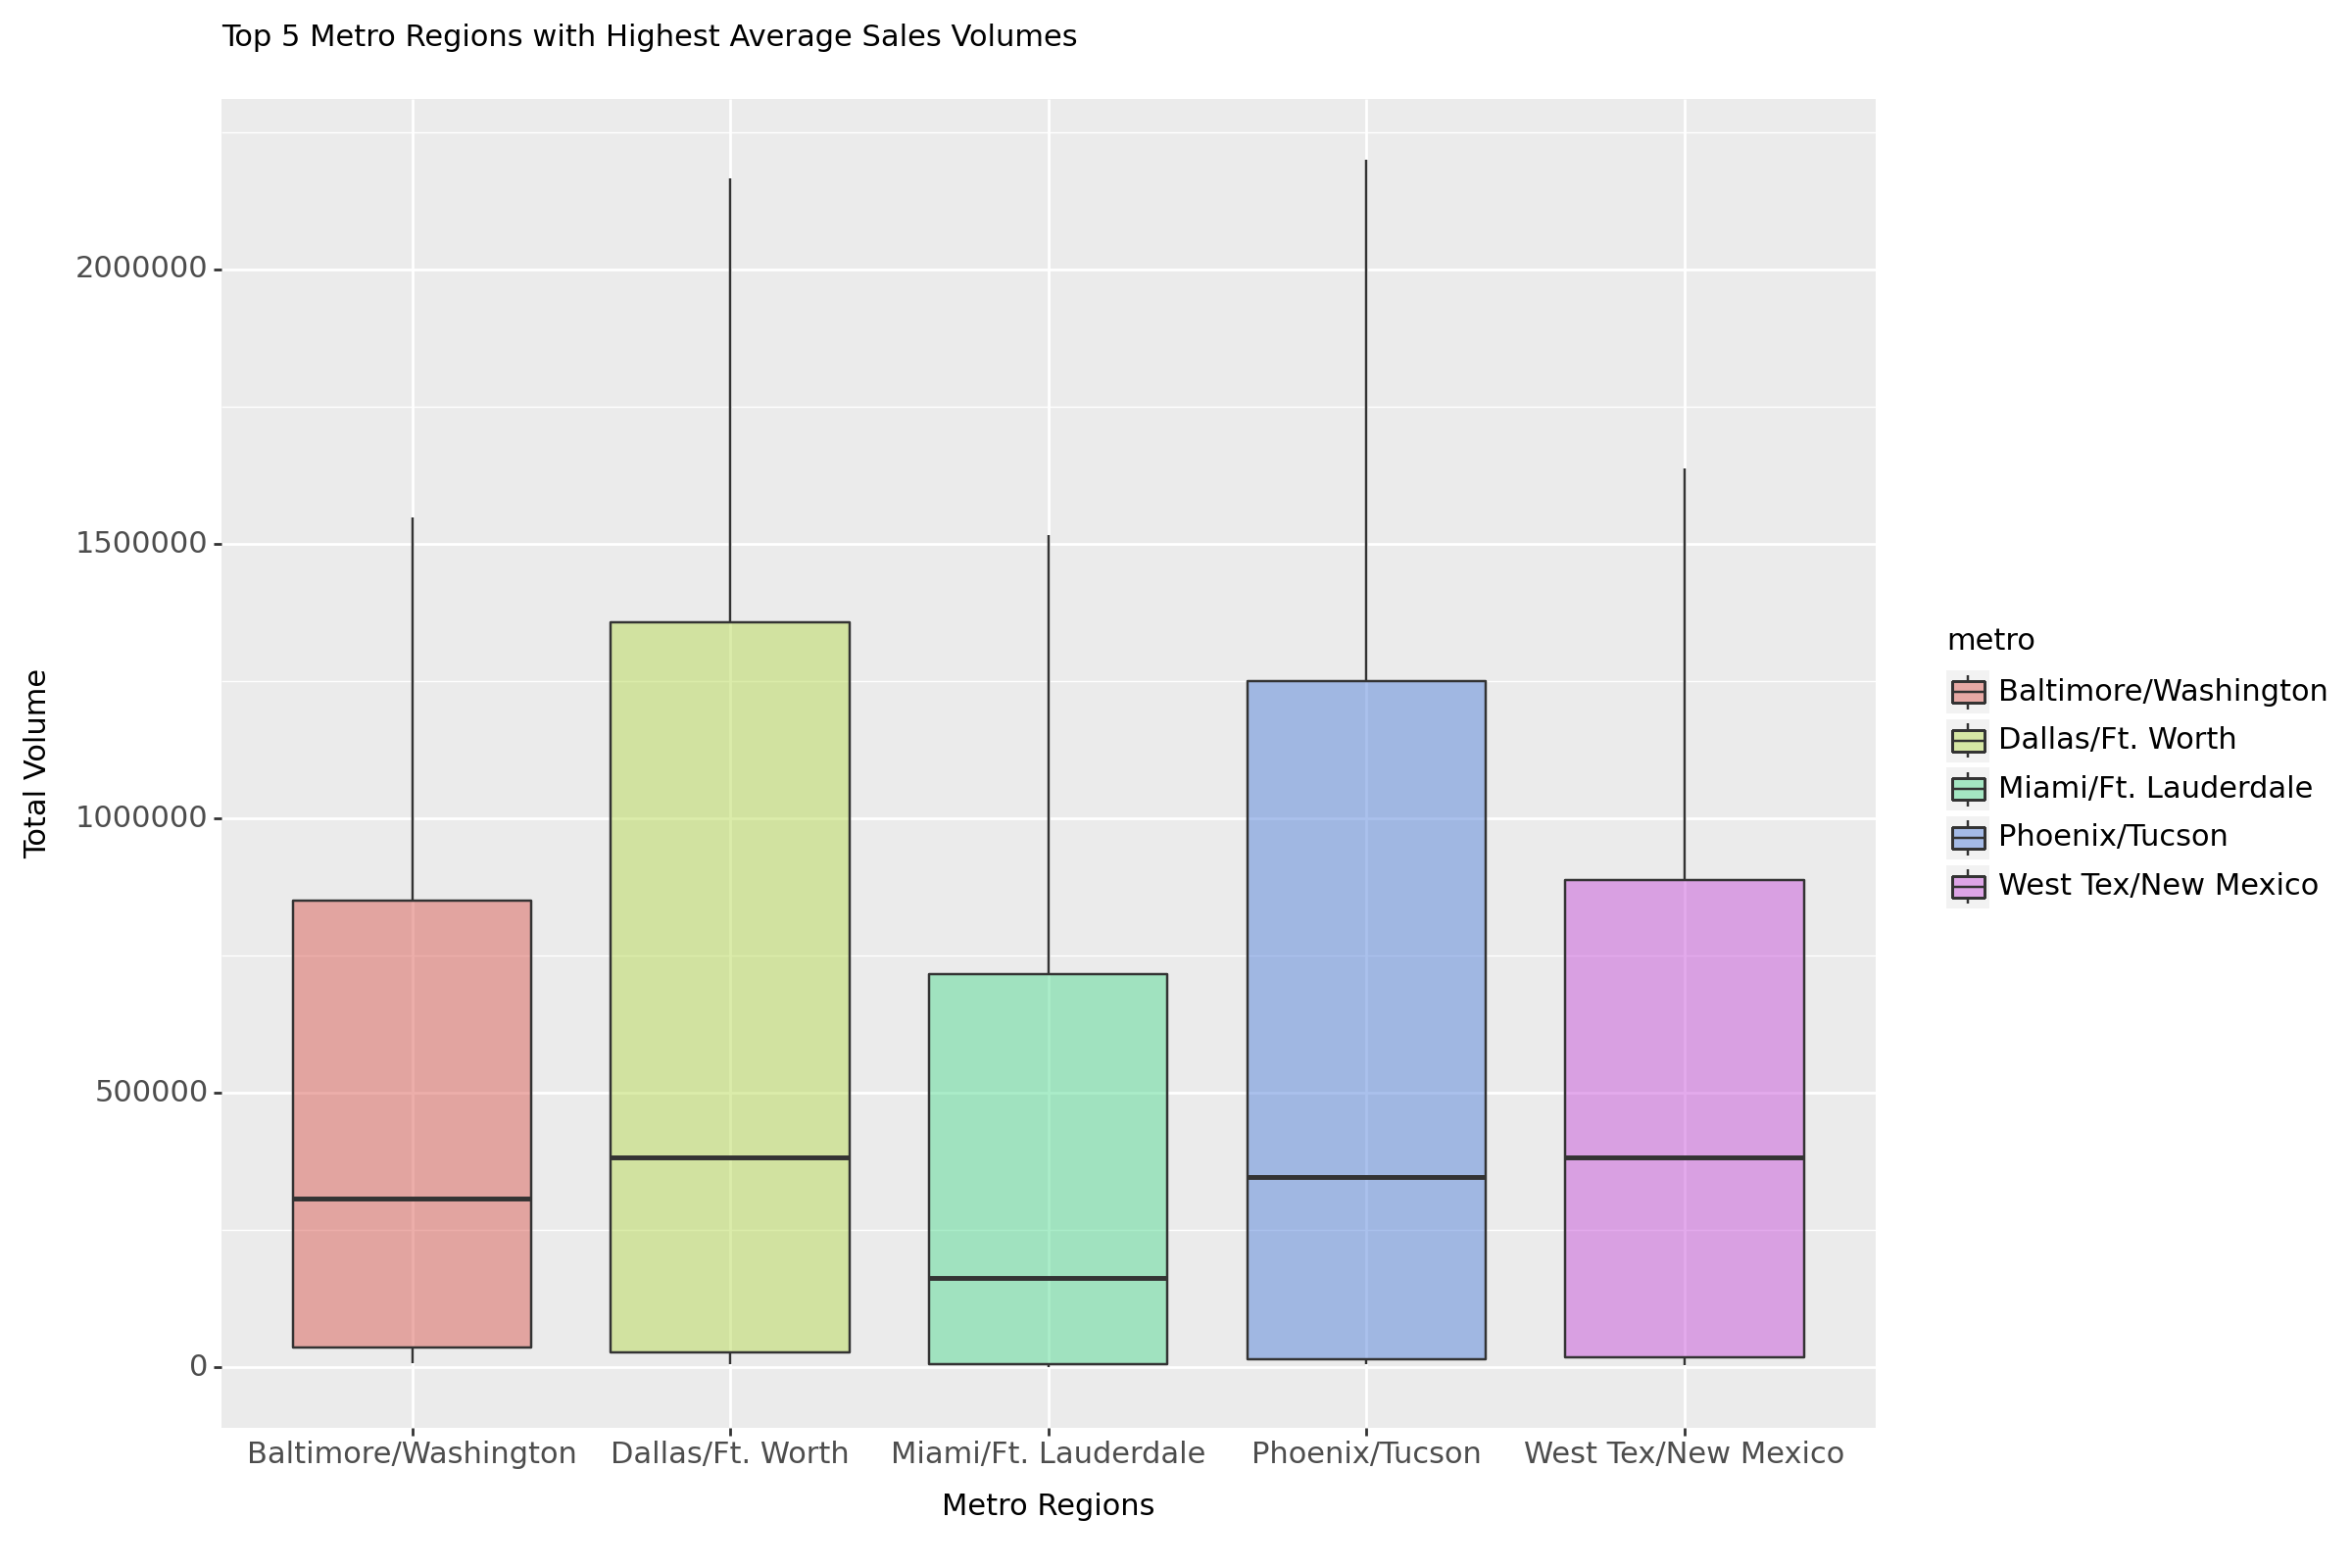

<Figure Size: (1200 x 800)>

In [441]:
plot = (ggplot(top_5_metros_df, aes(x ='metro', y ='total_volume', fill = 'metro'))
        + geom_boxplot(alpha = 0.5)
        + labs(title ='Top 5 Metro Regions with Highest Average Sales Volumes',
               x ='Metro Regions',y ='Total Volume')
        + p9.theme(text = p9.element_text(size = 11), figure_size = (12, 8)))

plot

**Above is a boxplot with the top 5 metro regions with the highest average volumes where Dallas/Ft. Worth is #1.**

# **Pivoting**

6. From your cleaned data set, create a data set with only these California regions {"Los Angeles", "San Diego", "Sacramento", and "San Francisco"} and answer the following questions about these California regions only.

In [442]:
# create a subset of data from the current dataset with only the cities mentioned
new_avocado_clean = avocado_clean[avocado_clean["city"].isin({"Los Angeles", "San Diego", "Sacramento", "San Francisco"})]

# dropping columns of region, metro, state and country as it is redundant
new_avocado_clean = new_avocado_clean.drop(columns=['metro', 'region', 'state', 'country'])
new_avocado_clean.head()

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Small Haas,Large Haas,Extra Large Haas,city,month,day,average total volume
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,1837999.65,524430.47,64225.78,Los Angeles,1,4,968399.676291
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,47721.51,1723.40,0.00,Los Angeles,1,4,968399.676291
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,110693.69,270107.61,9737.50,Sacramento,1,4,968399.676291
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,3727.52,4327.52,0.00,Sacramento,1,4,968399.676291
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,244152.26,165299.33,15302.75,San Diego,1,4,968399.676291


7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [443]:
# Find the average price for both organic and conventional avocados in each region and group them accordingly
avocado_average_price = new_avocado_clean.groupby(['city', 'type'])['average_price'].mean().reset_index()

# checking dataframe's format
avocado_average_price.head()

# since the dataframe from above gave us a long format and we want it in wide format, we need to use the pivot method
avocado_average_price = avocado_average_price.pivot(index='city', columns='type', values='average_price')
avocado_average_price

type,conventional,organic
city,,
Los Angeles,1.047124,1.574902
Sacramento,1.295359,1.873856
San Diego,1.113856,1.798366
San Francisco,1.400490,2.119444


In [444]:
# Now find the difference in prices using the values from above and store it in a new column
avocado_average_price['price_difference'] = avocado_average_price['organic'] - avocado_average_price['conventional']

# Rename the subset obtained to summary statistics
summary_statistics = avocado_average_price

#display the summary statistics
summary_statistics

type,conventional,organic,price_difference
city,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


**According to this dataframe, San Francisco is the California region where the price of organic versus conventional avocados is the most different.**

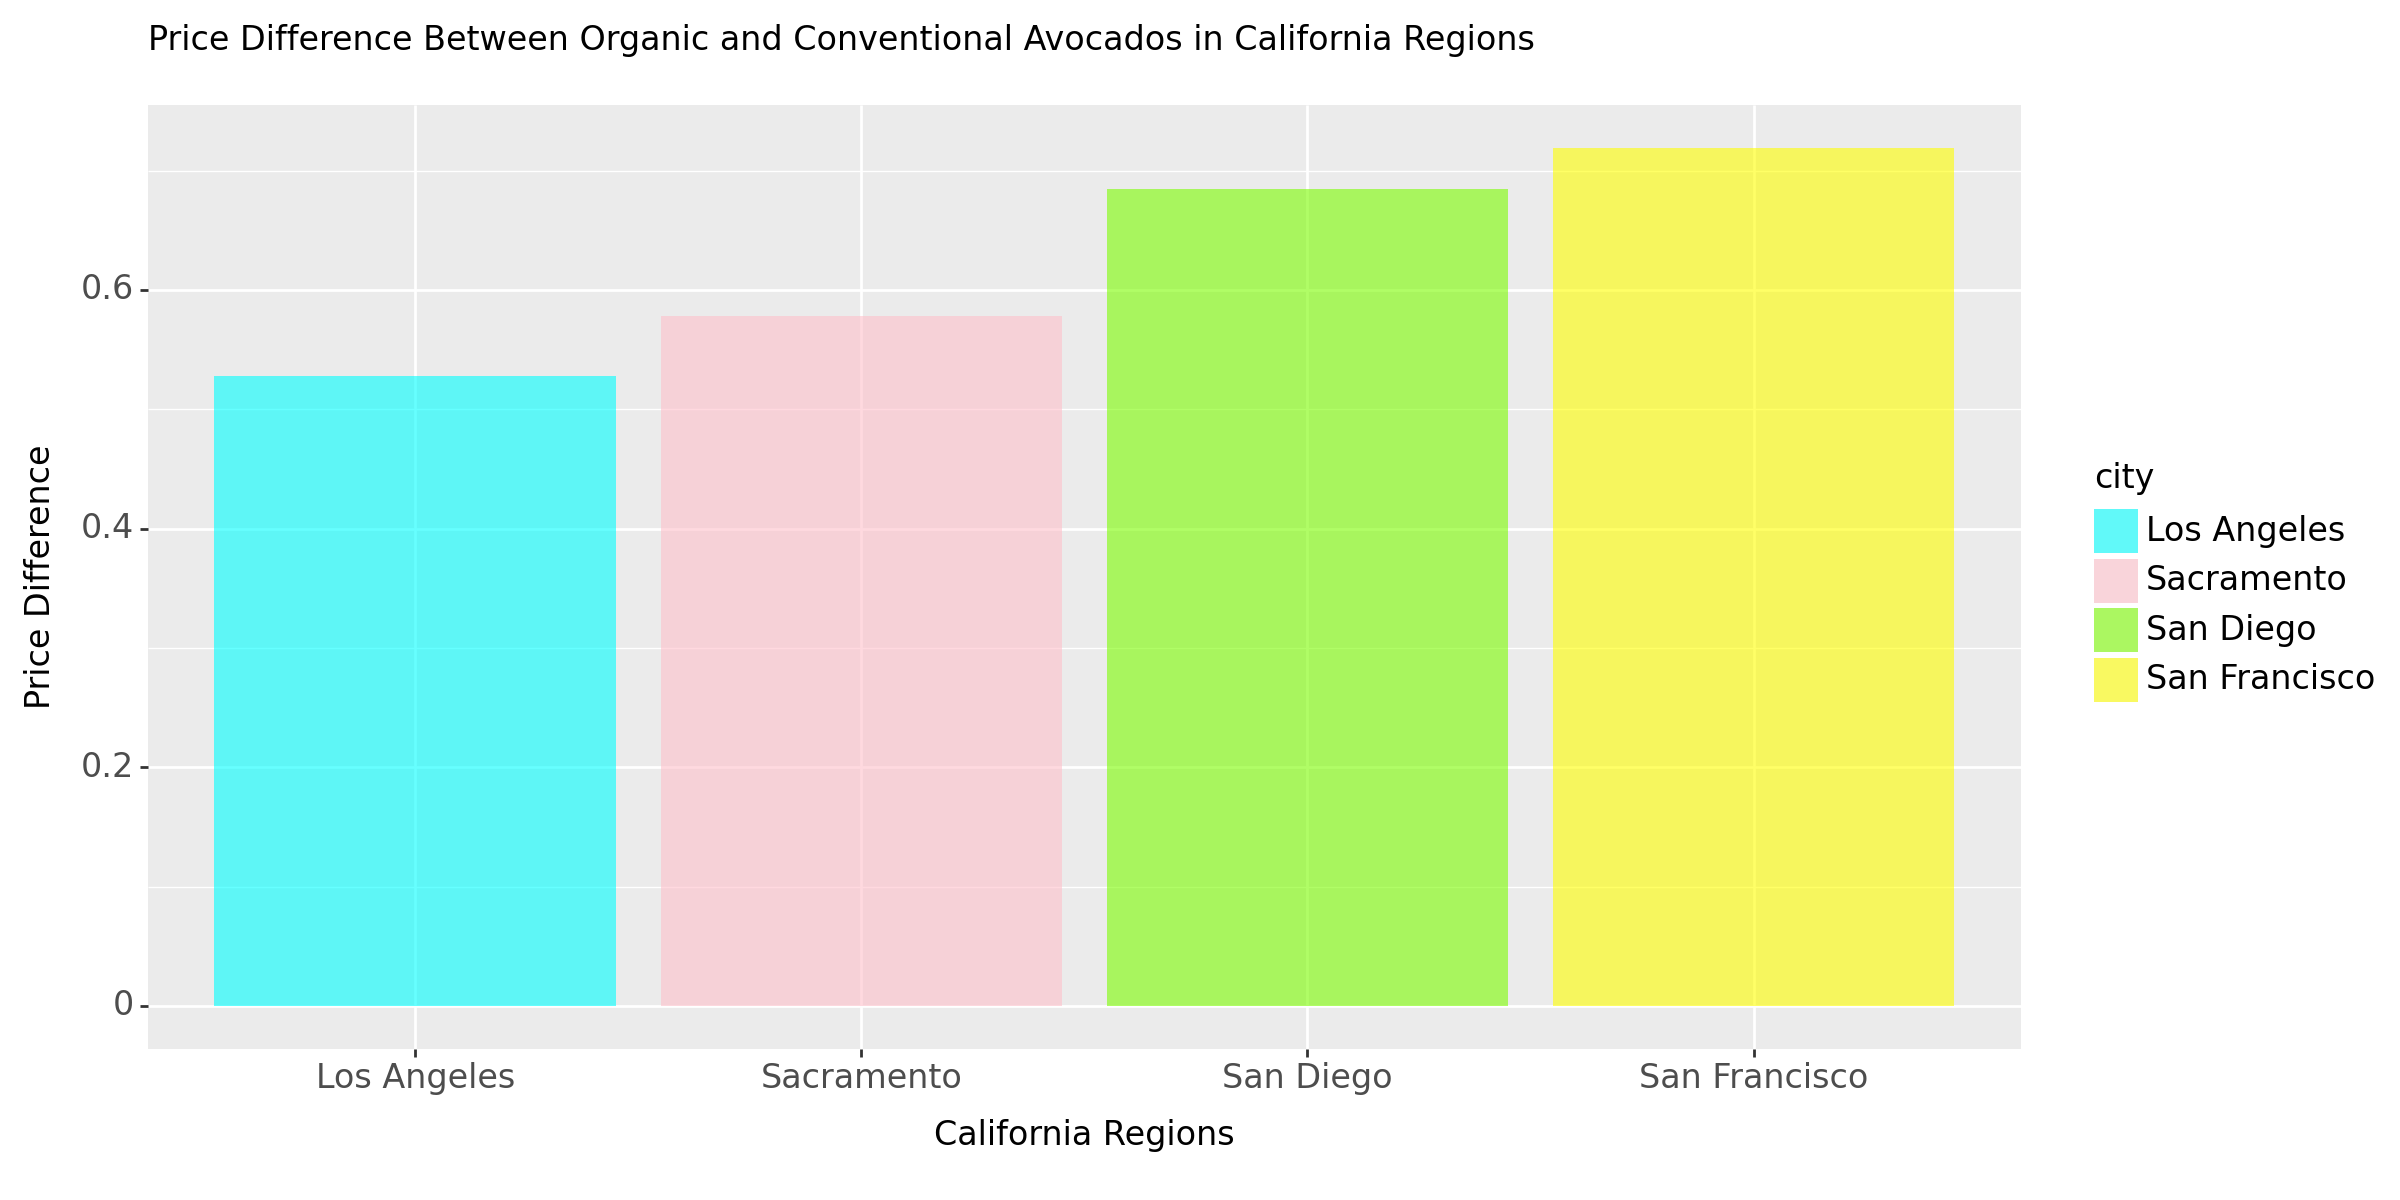

<Figure Size: (1200 x 600)>

In [445]:
# creating a barplot using ggplot to visualize the price difference between the 2 avocados according to city
bar_graph = (ggplot(avocado_average_price.reset_index(), aes(x = 'city', y = 'price_difference', fill = 'city'))
        + geom_bar(stat = 'identity', position = 'dodge', alpha = 0.6)
        + labs(title = 'Price Difference Between Organic and Conventional Avocados in California Regions',
               y = 'Price Difference', x = 'California Regions')
        + p9.theme(text = p9.element_text(size = 12), figure_size = (12, 6))
        + p9.scale_fill_manual(values = {"Los Angeles": "cyan", "Sacramento": "pink", "San Diego": "lawngreen", "San Francisco": "yellow"})
        )
bar_graph

8. Recreate the plot: for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic

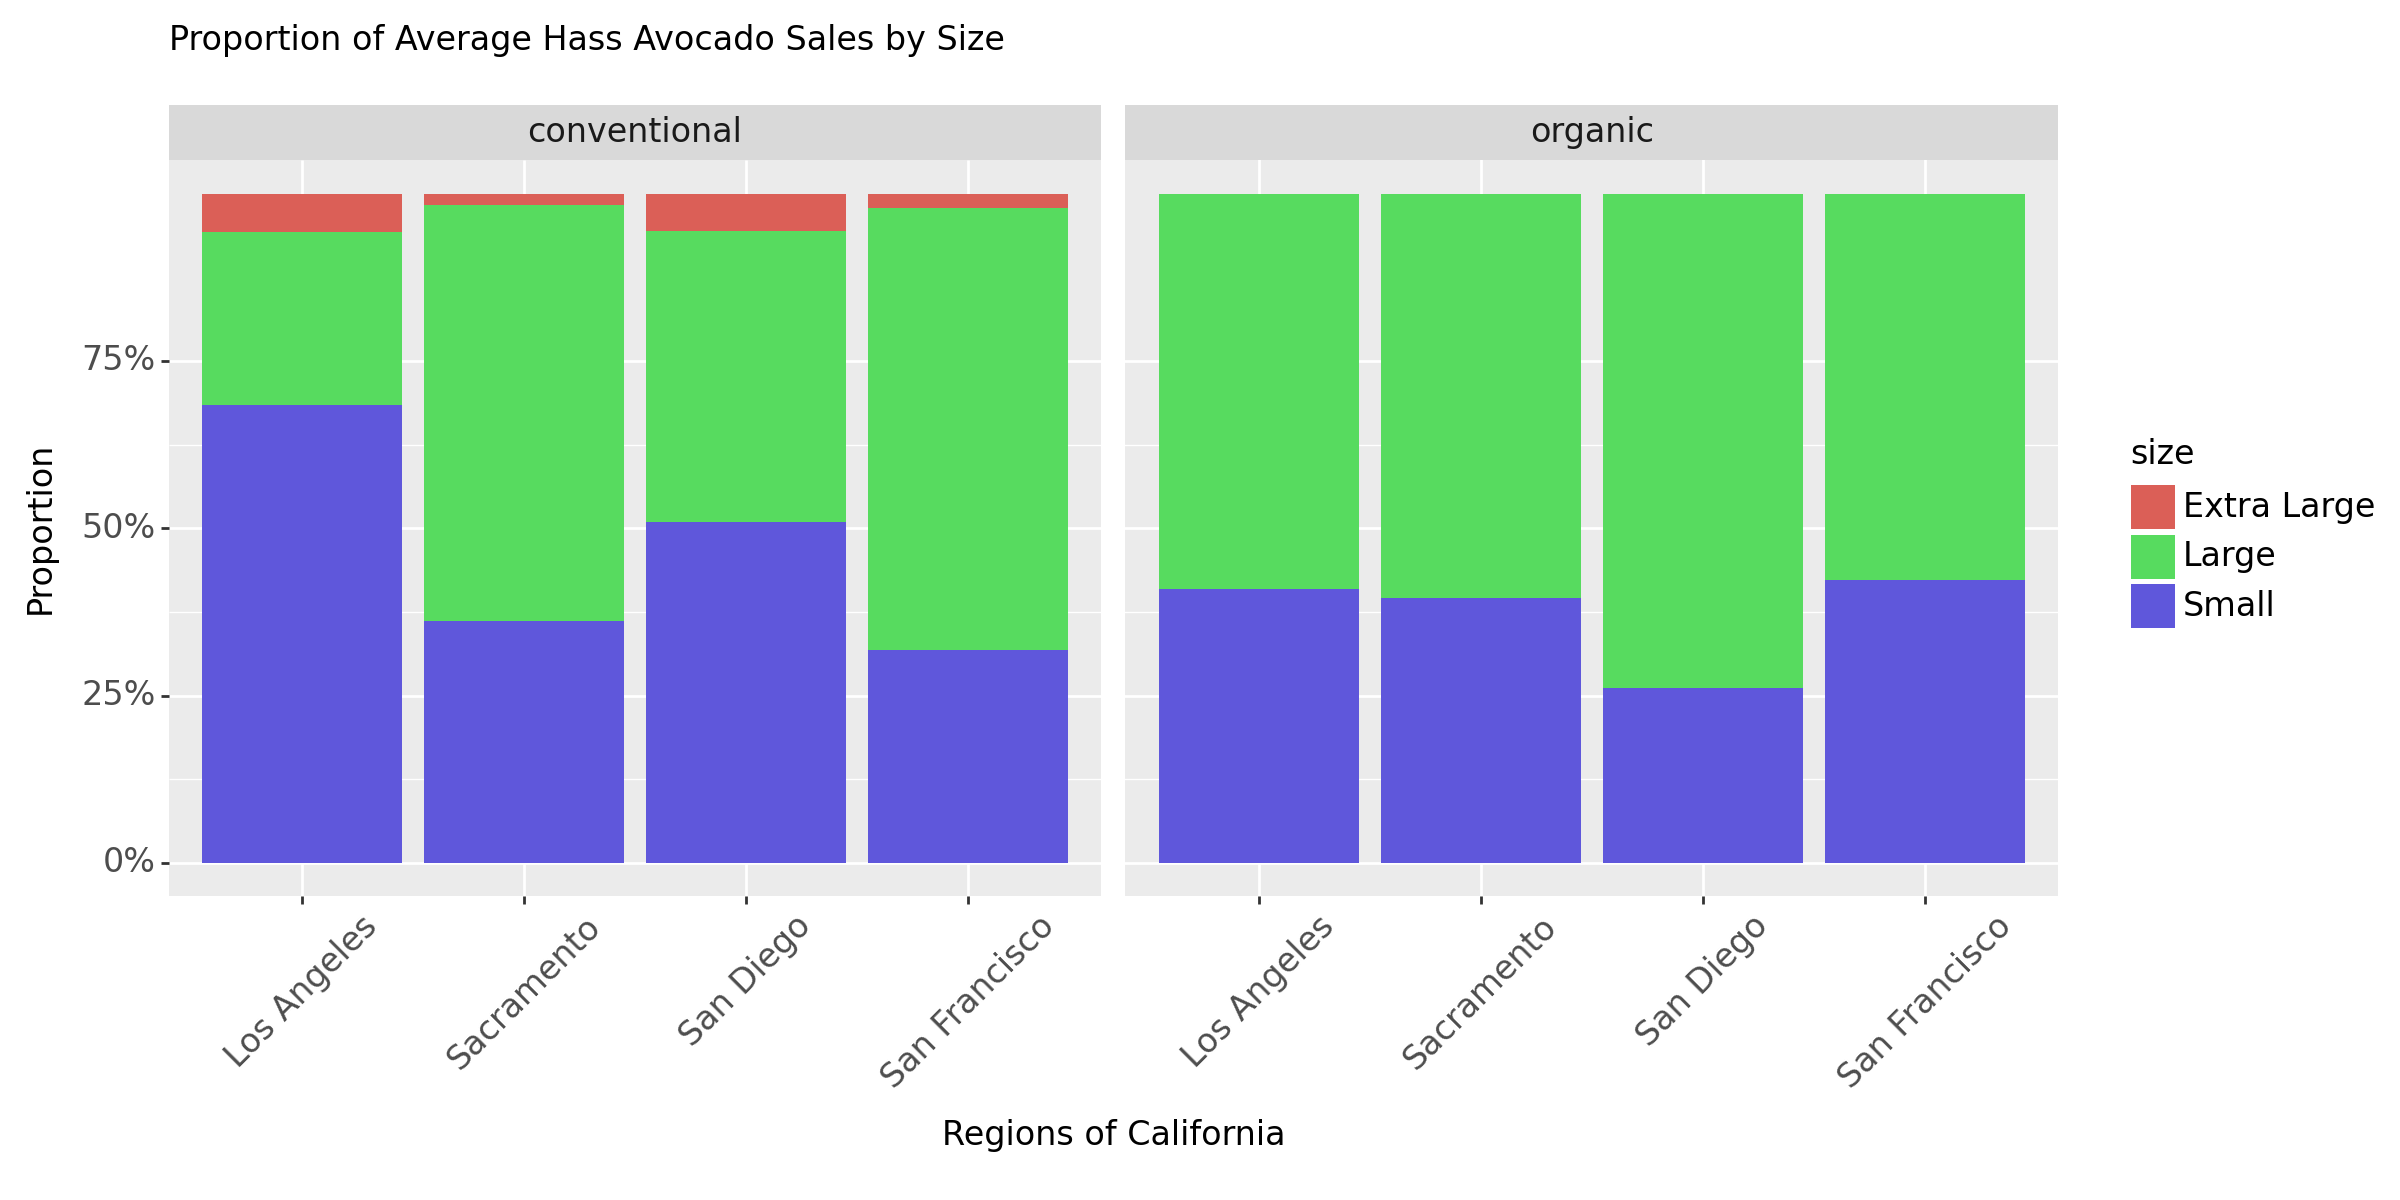

<Figure Size: (1200 x 600)>

In [446]:
# transform dataset format
melted_avocado_clean = new_avocado_clean.melt(id_vars=['city', 'type'],
                                   value_vars=['Small', 'Large', 'Extra Large'],
                                   var_name='size',
                                   value_name= 'sales_volume')
# group dataset by selected variables
melted_avocado_clean = melted_avocado_clean.groupby(['city', 'type', 'size'])['sales_volume'].mean().reset_index()

# find total sales by creating subset by grouping with selected variables
total_sales = melted_avocado_clean.groupby(["city", "type"])["sales_volume"].transform("sum")

# create new column with calculated proportion
melted_avocado_clean["proportion"] = melted_avocado_clean["sales_volume"] / total_sales


# Create the bar graphs
plot = (ggplot(melted_avocado_clean, aes(x = 'city', y = 'proportion', fill = 'size'))
        + geom_bar(stat = 'identity', position = 'stack')
        + facet_wrap('type')
        + labs(title="Proportion of Average Hass Avocado Sales by Size",
               x = "Regions of California",
               y= "Proportion")

        + p9.theme(text = p9.element_text(size = 12), figure_size = (12, 6))
        + theme(axis_text_x = element_text(angle = 45))
        + scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75, 100], labels=["0%", "25%", "50%", "75%", "100%"])
        )


plot

# **Using Outside Data**

8. Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.Support your argument with a plot.

In [447]:
# Import my outside dataset with house prices of every CA city
house_price_df = pd.read_csv("houseprices.csv")

house_price_df

,City,2015,2016,2017,2018,2019,2020
0,San Diego,445000,460000,502000,550000,580000,620000
1,San Francisco,1125000,1150000,1300000,1500000,1600000,1750000
2,Los Angeles,550000,575000,612000,650000,700000,750000
3,Sacramento,285000,295000,320000,340000,365000,380000


In [448]:
# merge new dataset with avocado sales dataset
new_avocado_clean = new_avocado_clean.merge(house_price_df, left_on=("city"),right_on=("City"))

new_avocado_clean

,date,average_price,total_volume,Small,Large,Extra Large,total_bags,small_bags,large_bags,xlarge_bags,...,month,day,average total volume,City,2015,2016,2017,2018,2019,2020
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,1,4,968399.676291,Los Angeles,550000,575000,612000,650000,700000,750000
1,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,...,1,4,968399.676291,Los Angeles,550000,575000,612000,650000,700000,750000
2,2015-01-11,0.85,2713699.60,1786326.65,617233.39,58892.91,251246.65,222971.68,25111.74,3163.23,...,1,11,968399.676291,Los Angeles,550000,575000,612000,650000,700000,750000
3,2015-01-11,1.08,60232.63,52087.31,2063.44,0.00,6081.88,6081.88,0.00,0.00,...,1,11,968399.676291,Los Angeles,550000,575000,612000,650000,700000,750000
4,2015-01-18,0.89,2800679.50,1925013.31,526106.80,59364.23,290195.16,260857.96,26671.18,2666.02,...,1,18,968399.676291,Los Angeles,550000,575000,612000,650000,700000,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2020-11-15,1.78,61454.10,4727.34,5548.32,0.00,51178.44,51088.34,90.10,0.00,...,11,15,968399.676291,San Francisco,1125000,1150000,1300000,1500000,1600000,1750000
2444,2020-11-22,1.28,778476.27,156625.29,167370.28,4767.84,449712.86,187499.75,257065.31,5147.80,...,11,22,968399.676291,San Francisco,1125000,1150000,1300000,1500000,1600000,1750000
2445,2020-11-22,1.87,59882.68,3110.05,4956.81,4.17,51811.65,51680.30,131.35,0.00,...,11,22,968399.676291,San Francisco,1125000,1150000,1300000,1500000,1600000,1750000
2446,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,...,11,29,968399.676291,San Francisco,1125000,1150000,1300000,1500000,1600000,1750000


In [449]:
df = pd.DataFrame(new_avocado_clean)

# convert year column to appropriate data type
df['year'] = df['date'].dt.year

In [450]:
# melt dataframe from wide to long format
melted_df = df.melt(id_vars=['year', 'average_price'],
                    value_vars=['2015', '2016', '2017', '2018', '2019', '2020'],
                    var_name='house_year',
                    value_name='house_price')

# group dataframe by relevant variables
new_avocado_df = melted_df.groupby(['year', 'average_price'])['house_price'].mean().reset_index()

new_avocado_df

,year,average_price,house_price
0,2015,0.66,6.395000e+05
1,2015,0.67,5.261667e+05
2,2015,0.74,6.395000e+05
3,2015,0.75,6.395000e+05
4,2015,0.78,6.395000e+05
...,...,...,...
882,2020,2.12,9.651667e+05
883,2020,2.13,1.404167e+06
884,2020,2.15,1.404167e+06
885,2020,2.26,1.404167e+06


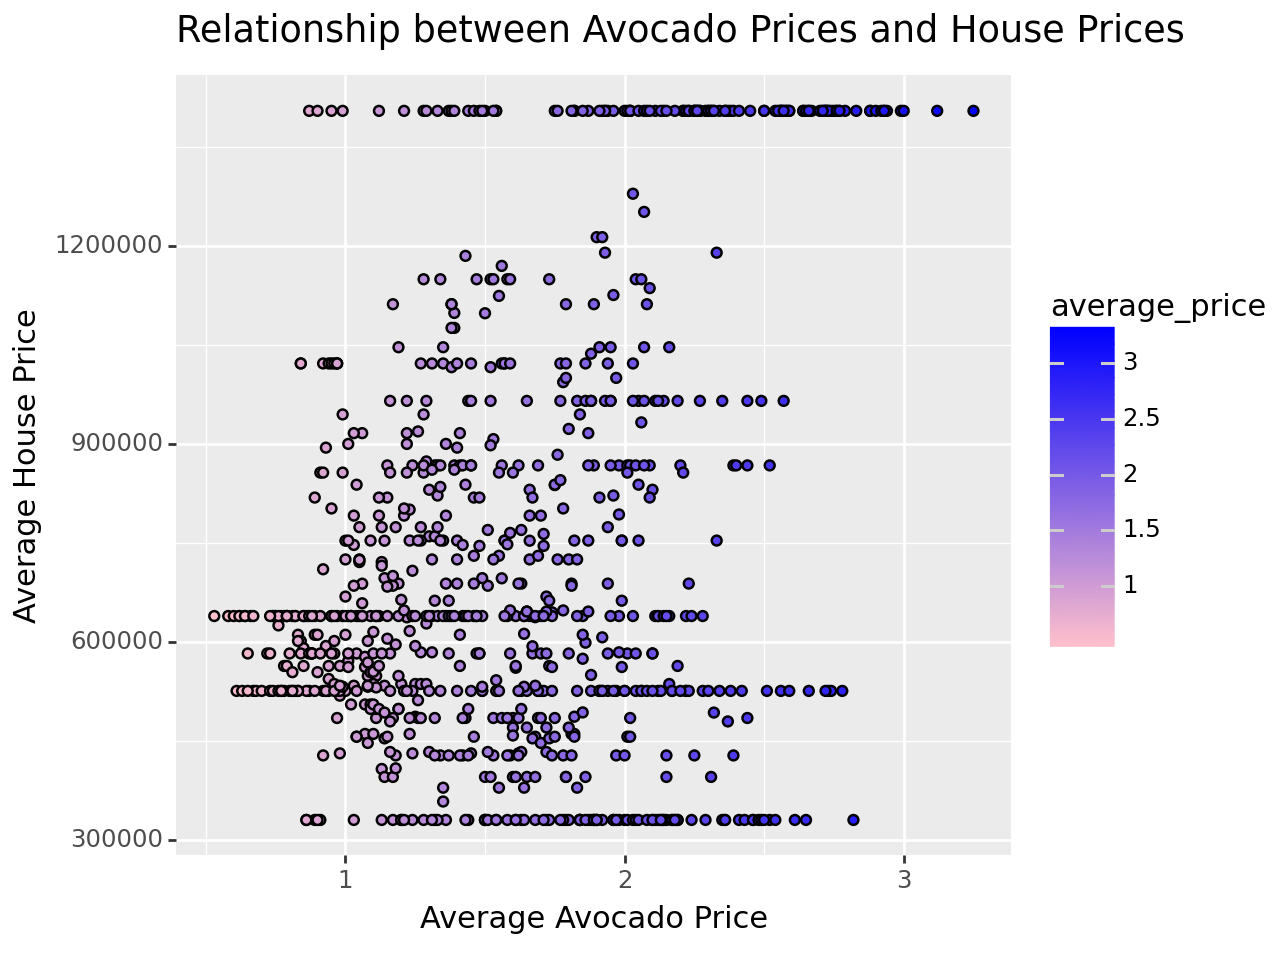

<Figure Size: (640 x 480)>

In [451]:
# create scatterplot to show relationship between avocado prices and house prices
scatter_plot = (ggplot(new_avocado_df, aes(x = 'average_price', y = 'house_price', fill = 'average_price'))
    + geom_point(aes(width = 1, height = 1))  # Adjust width and height for gaps between tiles
    + scale_fill_gradient(low = "pink", high = "blue")
    + labs(title='Relationship between Avocado Prices and House Prices',
           x ='Average Avocado Price',
           y='Average House Price')

)
scatter_plot

In [452]:
# calculates correlation coefficient between avg avocado price and house price
correlation = new_avocado_df['average_price'].corr(new_avocado_df['house_price'])
correlation

0.34393686275632845

***According to our calculated correlation coefficiant and our scatterplot above, there is a minimal positive correlation between avocado prices and house prices. Every time the price of avocados price goes up, the house price also goes up by a a coefficient of 0.344 across the San Francisco, Sacramento, San Diego and Los Angeles. ***